# Classification_data_preprocessing (In Progress)

**Note: the code is still in progress and is subjected to change**

**Dataset_1** : dataset of only annotations
- 25 input columns
- 1 output column (class)

**Dataset_2** : dataset of annotations with their respective geometrical position
- 125 input columns
- 1 output column (class)

## **colab prerequisites and mounting it to drive**

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.22-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.22-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.22-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/My Drive/Final_Model/Mobilenet/models_Tf/research/object_detection/

/content/drive/My Drive/Final_Model/Mobilenet/models_Tf/research/object_detection


## Setting the tensorflow version and enabling the gpu version

In [ ]:
import tensorflow as tf
tf.test.is_gpu_available()
#tf.config.list_physical_devices('GPU')


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


## Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.svm import LinearSVC
from collections import Counter
from imblearn.base import BaseSampler
from keras import metrics
from sklearn import preprocessing
from sklearn.utils import resample

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [ ]:
from keras.constraints import maxnorm

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Defining the neural network models required to tune the hyperparameters of the model using "Grid Search technique"

### Model defined for tuning number of epochs and batch size

In [ ]:
def model_1():
    inputs = keras.Input(shape=(25,))
    dense = layers.Dense(64, activation='relu')
    x=dense(inputs)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(16, activation='relu')(x)
    outputs = layers.Dense(6, activation='softmax')(x)
    
    model = keras.Model(inputs=inputs,outputs=outputs,name="Model_1")
    #model.summary()
    model.compile(loss='categorical_crossentropy' ,optimizer='adam' ,metrics=['accuracy'])
    return model
    

### Model defined for tuning the optimizer type

In [ ]:
def model_2(optimizer='adam'):
    inputs = keras.Input(shape=(25,))
    dense = layers.Dense(64, activation='relu')
    x=dense(inputs)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(16, activation='relu')(x)
    outputs = layers.Dense(6, activation='softmax')(x)
    
    model = keras.Model(inputs=inputs,outputs=outputs,name="Model_2")
    #summary = model.summary()
    model.compile(loss='categorical_crossentropy' ,optimizer= optimizer ,metrics=['accuracy'])
    return model
    

### Model defined for tuning the kernel initializers

In [ ]:
def model_3(init_mode='uniform'):
    inputs = keras.Input(shape=(25,))
    dense = layers.Dense(64, activation='relu')
    x=dense(inputs)
    x = layers.Dense(64, kernel_initializer=init_mode, activation='relu')(x)
    x = layers.Dense(32, kernel_initializer=init_mode, activation='relu')(x)
    x = layers.Dense(16, kernel_initializer=init_mode, activation='relu')(x)
    outputs = layers.Dense(6, activation='softmax')(x)
    
    model = keras.Model(inputs=inputs,outputs=outputs,name="Model_3")
    #model.summary()
    model.compile(loss='categorical_crossentropy' ,optimizer='adam' ,metrics=['accuracy'])
    return model
    

### Model defined for tuning the activation function

In [ ]:
def model_4(activation='relu'):
    inputs = keras.Input(shape=(25,))
    dense = layers.Dense(64, activation=activation)
    x=dense(inputs)
    x = layers.Dense(64, kernel_initializer='uniform', activation=activation)(x)
    x = layers.Dense(32, kernel_initializer='uniform', activation=activation)(x)
    x = layers.Dense(16, kernel_initializer='uniform', activation=activation)(x)
    outputs = layers.Dense(6, activation='softmax')(x)
    
    model = keras.Model(inputs=inputs,outputs=outputs,name="Model_4")
    #model.summary()
    model.compile(loss='categorical_crossentropy' ,optimizer='adam' ,metrics=['accuracy'])
    return model
    

### Model defined for tuning number of neurons in each layer

In [ ]:
def model_5(neurons1=1, neurons2=1, neurons3=1):
    inputs = keras.Input(shape=(25,))
    dense = layers.Dense(64, activation='softsign')
    x=dense(inputs)
    x = layers.Dense(neurons1, kernel_initializer='uniform',activation='softsign')(x)
    x = layers.Dense(neurons2, kernel_initializer='uniform',activation='softsign')(x)
    x = layers.Dense(neurons3, kernel_initializer='uniform', activation='softsign')(x)
    outputs = layers.Dense(6, activation='softmax')(x)
    
    model = keras.Model(inputs=inputs,outputs=outputs,name="Model_5")
    #model.summary()
    model.compile(loss='categorical_crossentropy' ,optimizer='adam' ,metrics=['accuracy'])
    return model
    

### Model defined for tuning the dropout rate and weight constraints

In [ ]:
def model_6(dropout_rate=0.0, weight_constraint=0):
    inputs = keras.Input(shape=(25,))
    dense = layers.Dense(64, activation='relu')
    x=dense(inputs)
    x = layers.Dense(64, kernel_initializer='uniform', activation='softsign', kernel_constraint=maxnorm(weight_constraint))(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(32, kernel_initializer='uniform', activation='softsign', kernel_constraint=maxnorm(weight_constraint))(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(16, kernel_initializer='uniform', activation='softsign', kernel_constraint=maxnorm(weight_constraint))(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(6, activation='softmax')(x)
    
    model = keras.Model(inputs=inputs,outputs=outputs,name="Model_6")
    #model.summary()
    model.compile(loss='categorical_crossentropy' ,optimizer='adam' ,metrics=['accuracy'])
    return model

## Reading the csv files (Datasets)

In [ ]:
data_class=pd.read_csv("class_dataset.csv", index_col=0)
data_pos=pd.read_csv("geo_pos_dataset.csv",index_col=0)
data_both=pd.read_csv("class_geo_dataset.csv", index_col=0)

## Refining and cleaning **Dataset_1** 

In [ ]:
data_class

,mirror,sink,toilet seat,bath tub,towel,bed,dresser cabinet,night table,table lamp,Tv screen,Bowling rack,Bowling ball,bowling pins,dining table,dining table lamp,vase,refrigerator,oven,range hood,chair,printer,computer,Monitor,Desk,keyboard,Class,image
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,bathroom,008.jpg
1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,bathroom,100_0281.jpg
2,1,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,bathroom,100_1412.jpg
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,bathroom,14_master_bathroom_jl.jpg
4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,bathroom,b1.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,2,office,office_10.jpg
565,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,2,office,office_13.jpg
566,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,office,or_02_03_0212_11_l.jpg
567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,office,or_02_05_0479_11_l.jpg


In [ ]:
df4 = data_class[ data_class['Class'] == 'bathroom' ]
df4['night table'].value_counts()
#for data in df4:
 #   data_class['chair']
        

0    97
Name: night table, dtype: int64

In [ ]:

df4 = data_class[ data_class['Class'] == 'bed' ].index
for data in df4:
    data_class.loc[data,'Class']='bedroom'
    

In [ ]:
data_class.Class.value_counts()

dining room       100
bedroom            98
bowling_lounge     98
bathroom           97
office             97
kitchen            79
Name: Class, dtype: int64

In [ ]:
df4= data_class[data_class['Class']=='bedroom'].chair.value_counts()
df4

0    98
Name: chair, dtype: int64

In [ ]:
df4 = data_class[ data_class['Class'] == 'bedroom' ].index
counter=0
for data in df4:
    if counter%10==0:
        data_class.loc[data,'chair']+=1
    counter+=1    

In [ ]:
df4= data_class[data_class['Class']=='bedroom'].chair.value_counts()
df4

0    88
1    10
Name: chair, dtype: int64

In [ ]:
df4= data_class[data_class['Class']=='dining room'].chair.value_counts()
df4

0    100
Name: chair, dtype: int64

In [ ]:
df4 = data_class[ data_class['Class'] == 'dining room' ].index
counter=0
for data in df4:
    if counter%20==0:
        data_class.loc[data,'chair']+=1
    counter+=1 

In [ ]:
df4 = data_class[ data_class['Class'] == 'dining room' ].index
counter=0
for data in df4:
    if counter%5==0:
        data_class.loc[data,'chair']+=1
    counter+=1 

In [ ]:
df4= data_class[data_class['Class']=='dining room'].chair.value_counts()
df4

0    80
1    15
2     5
Name: chair, dtype: int64

## Refining and cleaning **Dataset_2**

In [ ]:
data_both

,mirror,sink,toilet seat,bath tub,towel,bed,dresser cabinet,night table,table lamp,Tv screen,Bowling rack,Bowling ball,bowling pins,dining table,dining table lamp,vase,refrigerator,oven,range hood,chair,printer,computer,Monitor,Desk,keyboard,image,val_0,val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,val_9,val_10,val_11,val_12,val_13,...,val_61,val_62,val_63,val_64,val_65,val_66,val_67,val_68,val_69,val_70,val_71,val_72,val_73,val_74,val_75,val_76,val_77,val_78,val_79,val_80,val_81,val_82,val_83,val_84,val_85,val_86,val_87,val_88,val_89,val_90,val_91,val_92,val_93,val_94,val_95,val_96,val_97,val_98,val_99,Class
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,008.jpg,399.233891,0.488137,566.664451,187.932203,328.454230,288.000000,517.362727,395.877959,161.023744,227.471198,312.345778,412.962704,1.403401,232.474576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,bathroom
1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100_0281.jpg,183.254229,3.254239,413.762704,104.135597,174.033907,259.254233,469.084762,436.067805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,bathroom
2,1,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100_1412.jpg,38.440686,47.186445,175.661042,251.118640,132.271191,253.288140,264.067797,302.644084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,bathroom
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14_master_bathroom_jl.jpg,70.689277,105.762712,426.485865,322.531090,131.073446,351.457644,331.028260,458.485887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,bathroom
4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,b1.jpg,115.814685,0.578531,222.553672,103.846332,100.375154,117.803396,224.180791,195.037297,0.000000,0.000000,0.000000,0.000000,0.000000,166.327684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,bathroom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,2,office_10.jpg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,604.322065,397.288125,778.813559,522.033898,0.0,0.0,0.0,0.0,150.254253,294.237298,241.101695,381.016980,0.000000,0.000000,0.000000,0.000000,67.542383,368.135614,139.40678,402.033919,office
565,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,2,office_13.jpg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [ ]:
df4 = data_both[ data_both['Class'] == 'bed' ].index
for data in df4:
    data_both.loc[data,'Class']='bedroom'

In [ ]:
data_both.Class.value_counts()

dining room       100
bedroom            98
bowling_lounge     98
bathroom           97
office             97
kitchen            79
Name: Class, dtype: int64

In [ ]:
df4= data_both[data_both['Class']=='bedroom'].chair.value_counts()
df4

0    98
Name: chair, dtype: int64

In [ ]:
df4 = data_both[ data_both['Class'] == 'bedroom' ].index
counter=0
for data in df4:
    if counter%10==0:
        data_both.loc[data,'chair']+=1
    counter+=1    

In [ ]:
df4= data_both[data_both['Class']=='bedroom'].chair.value_counts()
df4

0    88
1    10
Name: chair, dtype: int64

In [ ]:
df4= data_both[data_both['Class']=='dining room'].chair.value_counts()
df4

0    100
Name: chair, dtype: int64

In [ ]:
df4 = data_both[ data_both['Class'] == 'dining room' ].index
counter=0
for data in df4:
    if counter%5==0:
        data_both.loc[data,'chair']+=1
    counter+=1 

In [ ]:
df4 = data_both[ data_both['Class'] == 'dining room' ].index
counter=0
for data in df4:
    if counter%20==0:
        data_both.loc[data,'chair']+=1
    counter+=1 

In [ ]:
df4= data_both[data_both['Class']=='dining room'].chair.value_counts()
df4

0    80
1    15
2     5
Name: chair, dtype: int64

In [ ]:
data_both=data_both.drop(columns='image')

In [ ]:
data_both

,mirror,sink,toilet seat,bath tub,towel,bed,dresser cabinet,night table,table lamp,Tv screen,Bowling rack,Bowling ball,bowling pins,dining table,dining table lamp,vase,refrigerator,oven,range hood,chair,printer,computer,Monitor,Desk,keyboard,val_0,val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,val_9,val_10,val_11,val_12,val_13,val_14,...,val_61,val_62,val_63,val_64,val_65,val_66,val_67,val_68,val_69,val_70,val_71,val_72,val_73,val_74,val_75,val_76,val_77,val_78,val_79,val_80,val_81,val_82,val_83,val_84,val_85,val_86,val_87,val_88,val_89,val_90,val_91,val_92,val_93,val_94,val_95,val_96,val_97,val_98,val_99,Class
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,399.233891,0.488137,566.664451,187.932203,328.454230,288.000000,517.362727,395.877959,161.023744,227.471198,312.345778,412.962704,1.403401,232.474576,267.437281,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,bathroom
1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183.254229,3.254239,413.762704,104.135597,174.033907,259.254233,469.084762,436.067805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,bathroom
2,1,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38.440686,47.186445,175.661042,251.118640,132.271191,253.288140,264.067797,302.644084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,bathroom
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70.689277,105.762712,426.485865,322.531090,131.073446,351.457644,331.028260,458.485887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,bathroom
4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,115.814685,0.578531,222.553672,103.846332,100.375154,117.803396,224.180791,195.037297,0.000000,0.000000,0.000000,0.000000,0.000000,166.327684,114.657640,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,bathroom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,604.322065,397.288125,778.813559,522.033898,0.0,0.0,0.0,0.0,150.254253,294.237298,241.101695,381.016980,0.000000,0.000000,0.000000,0.000000,67.542383,368.135614,139.40678,402.033919,office
565,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0

## Upsampling the datasets

### Upsampling **Dataset_1**

In [ ]:
upsampled_df = resample(data_class, replace=True, n_samples=3500, random_state=0)
upsampled_df

,mirror,sink,toilet seat,bath tub,towel,bed,dresser cabinet,night table,table lamp,Tv screen,Bowling rack,Bowling ball,bowling pins,dining table,dining table lamp,vase,refrigerator,oven,range hood,chair,printer,computer,Monitor,Desk,keyboard,Class,image
559,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0,office,office5.jpg
192,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,bedroom,IMG_2430.jpg
359,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,dining room,dining10.jpg
9,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,bathroom,b3.jpg
277,0,0,0,0,0,0,0,0,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,bowling_lounge,bowling_0094.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,dining room,dining013.jpg
345,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,dining room,dining035.jpg
149,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,bedroom,bed170.jpg
22,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,bathroom,bath26.jpg


In [ ]:
upsampled_df=upsampled_df.reset_index(drop=True)

### Upsampling **Dataset_2**

In [ ]:
upsampled_df_both = resample(data_both, replace=True, n_samples=3500, random_state=0)
upsampled_df_both

,mirror,sink,toilet seat,bath tub,towel,bed,dresser cabinet,night table,table lamp,Tv screen,Bowling rack,Bowling ball,bowling pins,dining table,dining table lamp,vase,refrigerator,oven,range hood,chair,printer,computer,Monitor,Desk,keyboard,val_0,val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,val_9,val_10,val_11,val_12,val_13,val_14,...,val_61,val_62,val_63,val_64,val_65,val_66,val_67,val_68,val_69,val_70,val_71,val_72,val_73,val_74,val_75,val_76,val_77,val_78,val_79,val_80,val_81,val_82,val_83,val_84,val_85,val_86,val_87,val_88,val_89,val_90,val_91,val_92,val_93,val_94,val_95,val_96,val_97,val_98,val_99,Class
559,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.491525,144.922041,170.775137,256.0,214.056497,138.847458,256.000000,198.146893,0.0,0.0,0.0,0.0,143.584194,117.441815,205.197740,163.145767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,office
192,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bedroom
359,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,126.119781,146.187566,161.988701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dining room
9,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.00000,0.000000,0.000000,165.712990,119.828246,237.740113,199.087019,59.335606,114.259887,188.058770,247.177414,5.785311,114.983051,114.65764,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bathroom
277,0,0,0,0,0,0,0,0,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bowling_lounge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,433.220362,614.110216,616.271171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dining room
345,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dining room
149,0,

In [ ]:
upsampled_df_both=upsampled_df_both.reset_index(drop=True)

## Splitting input and output columns

### Splitting input and output columns for **Dataset_1**

**Input**

In [ ]:
ips_1=IPS_1=upsampled_df.iloc[:,0:25]
ips_1

,mirror,sink,toilet seat,bath tub,towel,bed,dresser cabinet,night table,table lamp,Tv screen,Bowling rack,Bowling ball,bowling pins,dining table,dining table lamp,vase,refrigerator,oven,range hood,chair,printer,computer,Monitor,Desk,keyboard
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
3496,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3497,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3498,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Output**

In [ ]:
ops_1=OPS_1=upsampled_df.iloc[:,25:26]
ops_1

,Class
0,office
1,bedroom
2,dining room
3,bathroom
4,bowling_lounge
...,...
3495,dining room
3496,dining room
3497,bedroom
3498,bathroom


###  Splitting input and output columns for **Dataset_2**

**Input**

In [ ]:
ips_2=IPS_2=upsampled_df_both.iloc[:,0:125]
ips_2

,mirror,sink,toilet seat,bath tub,towel,bed,dresser cabinet,night table,table lamp,Tv screen,Bowling rack,Bowling ball,bowling pins,dining table,dining table lamp,vase,refrigerator,oven,range hood,chair,printer,computer,Monitor,Desk,keyboard,val_0,val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,val_9,val_10,val_11,val_12,val_13,val_14,...,val_60,val_61,val_62,val_63,val_64,val_65,val_66,val_67,val_68,val_69,val_70,val_71,val_72,val_73,val_74,val_75,val_76,val_77,val_78,val_79,val_80,val_81,val_82,val_83,val_84,val_85,val_86,val_87,val_88,val_89,val_90,val_91,val_92,val_93,val_94,val_95,val_96,val_97,val_98,val_99
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.491525,144.922041,170.775137,256.0,214.056497,138.847458,256.000000,198.146893,0.0,0.0,0.0,0.0,143.584194,117.441815,205.197740,163.145767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,103.376280,126.119781,146.187566,161.988701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.00000,0.000000,0.000000,165.712990,119.828246,237.740113,199.087019,59.335606,114.259887,188.058770,247.177414,5.785311,114.983051,114.65764,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,495.127119,433.220362,614.110216,616.271171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3496,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3497,0,0,0,0,0,1,0,

**Output**

In [ ]:
ops_2=OPS_2=upsampled_df_both.iloc[:,125:]
ops_2

,Class
0,office
1,bedroom
2,dining room
3,bathroom
4,bowling_lounge
...,...
3495,dining room
3496,dining room
3497,bedroom
3498,bathroom


## Splitting the data to train and test

### Splitting for **Dataset_1**

In [ ]:
ip_train_1, ip_test_1, op_train_1, op_test_1 = train_test_split(ips_1,ops_1, test_size = 0.10, random_state = 10)

In [ ]:
ip_train_1

In [ ]:
ip_test_1

In [ ]:
op_train_1

In [ ]:
op_test_1

### Splitting for **Dataset_2**

In [ ]:
ip_train_2, ip_test_2, op_train_2, op_test_2 = train_test_split(ips_2,ops_2, test_size = 0.10, random_state = 10)

In [ ]:
ip_train_2

In [ ]:
ip_test_2

In [ ]:
op_train_2

In [ ]:
op_test_2

## Create the Labelencoder object (Covernting the classes to numberical label)

### For **Dataset_1**

In [ ]:
# create the Labelencoder object
le = preprocessing.LabelEncoder()
op_train_1['Class'] = le.fit_transform(op_train_1['Class'])
op_test_1['Class'] = le.fit_transform(op_test_1['Class'])
op_train_1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Class
1708,1
2663,3
494,3
1624,1
1152,1
...,...
3441,4
1344,5
527,2
3197,2


### For **Dataset_2**

In [ ]:
# create the Labelencoder object
le = preprocessing.LabelEncoder()
op_train_2['Class'] = le.fit_transform(op_train_2['Class'])
op_test_2['Class'] = le.fit_transform(op_test_2['Class'])
op_train_2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Class
1708,1
2663,3
494,3
1624,1
1152,1
...,...
3441,4
1344,5
527,2
3197,2


## Balancing the classification classes of the dataset (Oversampling using SMOTE)

### For **Dataset_1**

In [ ]:
op_train_1['Class'].value_counts()

3    568
2    565
1    543
0    535
5    516
4    423
Name: Class, dtype: int64

In [ ]:
sm = SMOTE(ratio='all', random_state = 6)
ip_train_1_prep, op_train_1_prep = sm.fit_sample(ip_train_1, op_train_1.values.ravel())
print(sorted(Counter(op_train_1_prep).items()))

[(0, 568), (1, 568), (2, 568), (3, 568), (4, 568), (5, 568)]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
ip_train_1_samp=pd.DataFrame(ip_train_1_prep, columns = ip_train_1.columns)

In [ ]:
op_train_1_samp=pd.DataFrame(op_train_1_prep, columns = op_train_1.columns)

In [ ]:
ip_train_1_samp = ip_train_1_samp.round().astype(int)
ip_train_1_samp

,mirror,sink,toilet seat,bath tub,towel,bed,dresser cabinet,night table,table lamp,Tv screen,Bowling rack,Bowling ball,bowling pins,dining table,dining table lamp,vase,refrigerator,oven,range hood,chair,printer,computer,Monitor,Desk,keyboard
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3405,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,0,1
3406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
op_train_1_samp

,Class
0,1
1,3
2,3
3,1
4,1
...,...
3403,5
3404,5
3405,5
3406,5


### For **Dataset_2**

In [ ]:
op_train_2['Class'].value_counts()

3    568
2    565
1    543
0    535
5    516
4    423
Name: Class, dtype: int64

In [ ]:
sm = SMOTE(ratio='all', random_state = 6)
ip_train_2_prep, op_train_2_prep = sm.fit_sample(ip_train_2, op_train_2.values.ravel())
print(sorted(Counter(op_train_2_prep).items()))

[(0, 568), (1, 568), (2, 568), (3, 568), (4, 568), (5, 568)]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
ip_train_2_samp=pd.DataFrame(ip_train_2_prep, columns = ip_train_2.columns)

In [ ]:
op_train_2_samp=pd.DataFrame(op_train_2_prep, columns = op_train_2.columns)

In [ ]:
ip_train_2_samp = ip_train_2_samp.round().astype(int)
ip_train_2_samp

,mirror,sink,toilet seat,bath tub,towel,bed,dresser cabinet,night table,table lamp,Tv screen,Bowling rack,Bowling ball,bowling pins,dining table,dining table lamp,vase,refrigerator,oven,range hood,chair,printer,computer,Monitor,Desk,keyboard,val_0,val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,val_9,val_10,val_11,val_12,val_13,val_14,...,val_60,val_61,val_62,val_63,val_64,val_65,val_66,val_67,val_68,val_69,val_70,val_71,val_72,val_73,val_74,val_75,val_76,val_77,val_78,val_79,val_80,val_81,val_82,val_83,val_84,val_85,val_86,val_87,val_88,val_89,val_90,val_91,val_92,val_93,val_94,val_95,val_96,val_97,val_98,val_99
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,755,572,941,763,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,67,105,207,0,0,0,0,0,0,0,0,0,0,0,0,63,79,253,252,0,0,0,0
3404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,131,185,243,0,0,0,0,0,0,0,0,21,84,92,132,0,0,0,0,0,0,0,0
3405,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,100,127,225,178,106,253,152,0,110,30,178,100,71,145,112,0,0,0,0,68,114,126,128
3406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,162,141,240,0,0,0,0,0,0,0,0,0,0,0,0,93,125,307,234,0,0,0,0


In [ ]:
op_train_2_samp

,Class
0,1
1,3
2,3
3,1
4,1
...,...
3403,5
3404,5
3405,5
3406,5


## Converting the Output data to categorical

### For **Dataset_1**

In [ ]:
op_train_1_samp=to_categorical(op_train_1_samp)
op_test_1_cat= to_categorical(op_test_1)

In [ ]:
op_train_1_samp

In [ ]:
op_test_1_cat

### For **Dataset_2**

In [ ]:
op_train_2_samp=to_categorical(op_train_2_samp)
op_test_2_cat= to_categorical(op_test_2)

In [ ]:
op_train_2_samp

In [ ]:
op_test_2_cat

## Normalizing the dataset 

### For **Dataset_1**

In [ ]:
x = ip_train_1_samp.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
ip_train_Nor = pd.DataFrame(x_scaled,columns=ip_train_1_samp.columns)

In [ ]:
ip_train_Nor

,mirror,sink,toilet seat,bath tub,towel,bed,dresser cabinet,night table,table lamp,Tv screen,Bowling rack,Bowling ball,bowling pins,dining table,dining table lamp,vase,refrigerator,oven,range hood,chair,printer,computer,Monitor,Desk,keyboard
0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,0.5,0.333333,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,0.0,1.0,0.0
3404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,0.2,0.0,0.0
3405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.25,0.5,0.5,0.4,0.0,0.5
3406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,0.0,1.0,0.0


In [ ]:
ip_test_1_samp=ip_test_1
x = ip_test_1_samp.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
ip_test_Nor = pd.DataFrame(x_scaled,columns=ip_test_1_samp.columns)

In [ ]:
ip_test_Nor

,mirror,sink,toilet seat,bath tub,towel,bed,dresser cabinet,night table,table lamp,Tv screen,Bowling rack,Bowling ball,bowling pins,dining table,dining table lamp,vase,refrigerator,oven,range hood,chair,printer,computer,Monitor,Desk,keyboard
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.142857,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.5,0.5,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.5,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.5,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.428571,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.2,1.0,0.5
348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.142857,0.636364,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


### For **Dataset_2**

In [ ]:
x = ip_train_2_samp.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_2 = min_max_scaler.fit_transform(x)
ip_train_Nor_2 = pd.DataFrame(x_scaled_2,columns=ip_train_2_samp.columns)

In [ ]:
ip_train_Nor_2

,mirror,sink,toilet seat,bath tub,towel,bed,dresser cabinet,night table,table lamp,Tv screen,Bowling rack,Bowling ball,bowling pins,dining table,dining table lamp,vase,refrigerator,oven,range hood,chair,printer,computer,Monitor,Desk,keyboard,val_0,val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,val_9,val_10,val_11,val_12,val_13,val_14,...,val_60,val_61,val_62,val_63,val_64,val_65,val_66,val_67,val_68,val_69,val_70,val_71,val_72,val_73,val_74,val_75,val_76,val_77,val_78,val_79,val_80,val_81,val_82,val_83,val_84,val_85,val_86,val_87,val_88,val_89,val_90,val_91,val_92,val_93,val_94,val_95,val_96,val_97,val_98,val_99
0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,0.5,0.333333,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.613821,0.556962,0.672143,0.645516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007053,0.044137,0.041064,0.106481,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049219,0.078373,0.097608,0.129630,0.000000,0.000000,0.000000,0.000000
3404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
ip_test_2_samp=ip_test_2
x = ip_test_2_samp.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_2 = min_max_scaler.fit_transform(x)
ip_test_Nor_2 = pd.DataFrame(x_scaled_2,columns=ip_test_2_samp.columns)

In [ ]:
ip_test_Nor_2

,mirror,sink,toilet seat,bath tub,towel,bed,dresser cabinet,night table,table lamp,Tv screen,Bowling rack,Bowling ball,bowling pins,dining table,dining table lamp,vase,refrigerator,oven,range hood,chair,printer,computer,Monitor,Desk,keyboard,val_0,val_1,val_2,val_3,val_4,val_5,val_6,val_7,val_8,val_9,val_10,val_11,val_12,val_13,val_14,...,val_60,val_61,val_62,val_63,val_64,val_65,val_66,val_67,val_68,val_69,val_70,val_71,val_72,val_73,val_74,val_75,val_76,val_77,val_78,val_79,val_80,val_81,val_82,val_83,val_84,val_85,val_86,val_87,val_88,val_89,val_90,val_91,val_92,val_93,val_94,val_95,val_96,val_97,val_98,val_99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.142857,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.5,0.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.170722,0.302474,0.385988,0.39308,0.287754,0.004871,0.651537,0.108772,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.5,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.5,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.428571,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000

## Grid searching to tune the Hyper-parameters of the neural network to choose the optimum values

### Tuning batch size and epochs

In [ ]:

model = KerasClassifier(build_fn=model_1, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100 ]
epochs = [ 10,50, 100, 200]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=150)
grid_result = grid.fit(ip_train_Nor, op_train_1_samp)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### Tuning optimizer

In [ ]:

model = KerasClassifier(build_fn=model_2, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = [ 'SGD', 'RMSprop', 'Adagrad', 'Adadelta','Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=150)
grid_result = grid.fit(ip_train_Nor, op_train_1_samp)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### Tuning network weights initialization  

In [ ]:

model = KerasClassifier(build_fn=model_3, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=150)
grid_result = grid.fit(ip_train_Nor, op_train_1_samp)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### Tuning activation

In [ ]:

model = KerasClassifier(build_fn=model_4, epochs=150, batch_size=10, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=150)
grid_result = grid.fit(ip_train_Nor, op_train_1_samp)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### Tuning number of neurons

In [ ]:

model = KerasClassifier(build_fn=model_5, epochs=150, batch_size=10, verbose=0)
# define the grid search parameters
neurons1 = [5, 10, 20,  30, 50]
neurons2 = [5, 10, 20,  30, 50]
neurons3 = [5, 10, 20,  30, 50]
param_grid = dict(neurons1=neurons1,neurons2=neurons2 )
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=150)
grid_result = grid.fit(ip_train_Nor, op_train_1_samp)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### Tuning the Dropout_rate and weight constraint

In [ ]:
model = KerasClassifier(build_fn=model_6, epochs=150, batch_size=10, verbose=0)
# define the grid search parameters
weight_constraint = [1, 2, 3]
dropout_rate = [0.0, 0.2, 0.4, 0.6,0.8]
param_grid = dict(weight_constraint = weight_constraint ,dropout_rate=dropout_rate )
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=150)
grid_result = grid.fit(ip_train_Nor, op_train_1_samp)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

## Final models

### Neural Network model for **Dataset_1**

In [ ]:
inputs = keras.Input(shape=(25,))
dense = layers.Dense(64, activation='relu')
x=dense(inputs)
x = layers.Dense(64, kernel_initializer='uniform', activation='softsign', kernel_constraint=maxnorm(2))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, kernel_initializer='uniform', activation='softsign', kernel_constraint=maxnorm(2))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(16, kernel_initializer='uniform', activation='softsign', kernel_constraint=maxnorm(2))(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(6, activation='softmax')(x)
    
model = keras.Model(inputs=inputs,outputs=outputs,name="Model_final")
model.summary()
model.compile(loss='categorical_crossentropy' ,optimizer='adam' ,metrics=['accuracy'])

Model: "Model_final"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 25)]              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                1664      
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                

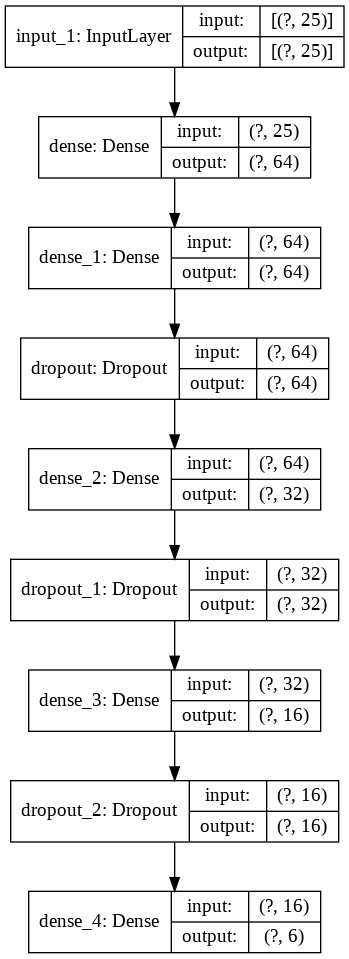

In [ ]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

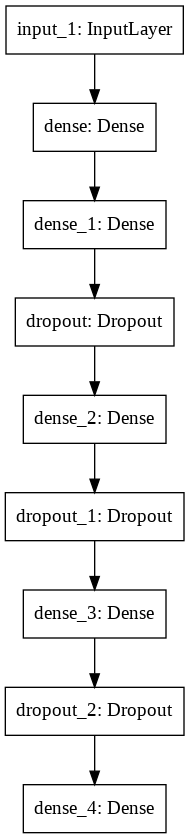

In [ ]:
keras.utils.plot_model(model, "my_first_model.png")

In [ ]:
model.fit(ip_train_Nor,op_train_1_samp,epochs= 150, batch_size= 10, verbose=150)

**Accuracy of Train**

In [ ]:
_,train_acc = model.evaluate(ip_train_Nor,op_train_1_samp)
print('Accuracy: %.2f' % (train_acc*100))   

3408/3408 [==============================] - 0s 64us/sample - loss: 0.0188 - acc: 0.9944
Accuracy: 99.44


**Accuracy of Test**

In [ ]:
_,test_acc = model.evaluate(ip_test_Nor,op_test_1_cat)
print('Accuracy: %.2f' % (test_acc*100))

350/350 [==============================] - 0s 86us/sample - loss: 0.0414 - acc: 0.9829
Accuracy: 98.29


In [ ]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
predictions = model.predict(ip_test_1)

Train: 0.994, Test: 0.983


In [ ]:
#predictions = model.predict_classes(ip_test_1)
predictions = model.predict(ip_test_1)
predictions.shape
predictions = np.argmax(predictions, axis=-1)
op_test_1_cat= to_categorical(op_test_1)
op_test_1_cat.shape
op_test_1_cat = np.argmax(op_test_1_cat, axis=-1)

**Sample prediction**

In [ ]:
for i in range(10):
    print('predicted = %d ,(expected = %d)' %(predictions[i], op_test_1_cat[i]))

predicted = 2 ,(expected = 2)
predicted = 1 ,(expected = 1)
predicted = 1 ,(expected = 1)
predicted = 4 ,(expected = 4)
predicted = 1 ,(expected = 1)
predicted = 1 ,(expected = 1)
predicted = 4 ,(expected = 4)
predicted = 2 ,(expected = 2)
predicted = 0 ,(expected = 0)
predicted = 3 ,(expected = 3)


**Confusion Matrix for Dataset_1**

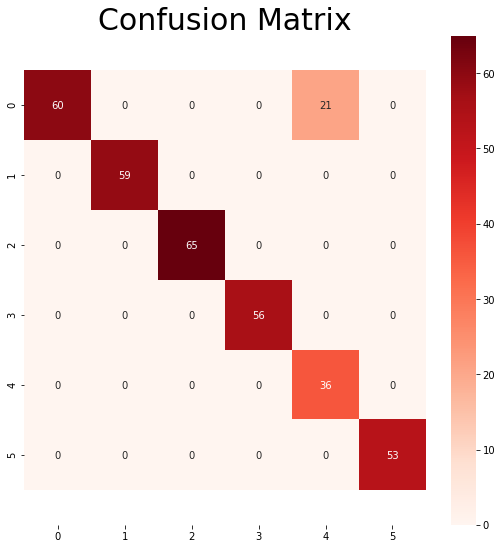

In [ ]:
# creating a confusion matrix
cm = confusion_matrix(predictions, op_test_1_cat)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (9, 9)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Confusion Matrix', fontweight = 20, fontsize = 30)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!
plt.show()

**Precision, Recall, F1-score for Dataset_1**

In [ ]:

results = confusion_matrix(op_test_1_cat, predictions) 
print('Accuracy Score :',accuracy_score(op_test_1_cat, predictions)) 
print ('Report : ')
print (classification_report(op_test_1_cat, predictions)) 

Accuracy Score : 0.94
Report : 
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        60
           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00        56
           4       1.00      0.63      0.77        57
           5       1.00      1.00      1.00        53

    accuracy                           0.94       350
   macro avg       0.96      0.94      0.94       350
weighted avg       0.96      0.94      0.94       350



**Save model**

In [ ]:
model.save("Model_1")

### Neural Network model for **Dataset_2**

In [ ]:
inputs = keras.Input(shape=(125,))
dense = layers.Dense(128, activation='relu')
x=dense(inputs)
x = layers.Dense(64, kernel_initializer='uniform', activation='softsign', kernel_constraint=maxnorm(2))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, kernel_initializer='uniform', activation='softsign', kernel_constraint=maxnorm(2))(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(16, kernel_initializer='uniform', activation='softsign', kernel_constraint=maxnorm(2))(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(6, activation='softmax')(x)
    
model = keras.Model(inputs=inputs,outputs=outputs,name="Model_final")
model.summary()
model.compile(loss='categorical_crossentropy' ,optimizer='adam' ,metrics=['accuracy'])

Model: "Model_final"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 125)]             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16128     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                

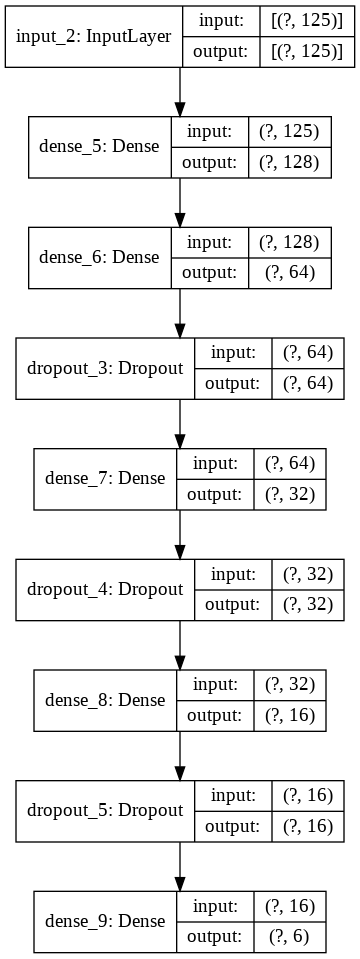

In [ ]:
keras.utils.plot_model(model, "my_second_model_with_shape_info.png", show_shapes=True)

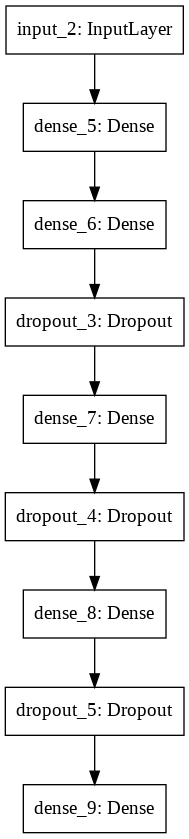

In [ ]:
keras.utils.plot_model(model, "my_second_model.png")

In [ ]:
model.fit(ip_train_Nor_2,op_train_2_samp,epochs= 150, batch_size= 10, verbose=150)

**Accuracy of train and test**

In [ ]:
_,train_acc = model.evaluate(ip_train_Nor_2,op_train_2_samp)
print('Accuracy of train: %.2f' % (train_acc*100))   

_,test_acc = model.evaluate(ip_test_Nor_2,op_test_2_cat)
print('Accuracy of test: %.2f' % (test_acc*100))

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
predictions = model.predict(ip_test_2)

3408/3408 [==============================] - 0s 62us/sample - loss: 0.0000e+00 - acc: 1.0000
Accuracy of train: 100.00
350/350 [==============================] - 0s 56us/sample - loss: 0.0000e+00 - acc: 1.0000
Accuracy of test: 100.00
Train: 1.000, Test: 1.000


**Sample Prediction**

In [ ]:
predictions_2 = model.predict(ip_test_2)
predictions_2.shape
predictions_2 = np.argmax(predictions_2, axis=-1)
op_test_2_cat= to_categorical(op_test_2)
op_test_2_cat.shape
op_test_2_cat = np.argmax(op_test_2_cat, axis=-1)

for i in range(10):
    print('predicted = %d ,(expected = %d)' %(predictions_2[i], op_test_2_cat[i]))

predicted = 2 ,(expected = 2)
predicted = 1 ,(expected = 1)
predicted = 1 ,(expected = 1)
predicted = 4 ,(expected = 4)
predicted = 1 ,(expected = 1)
predicted = 1 ,(expected = 1)
predicted = 4 ,(expected = 4)
predicted = 2 ,(expected = 2)
predicted = 0 ,(expected = 0)
predicted = 3 ,(expected = 3)


**Confusion Matrix for Dataset_2**

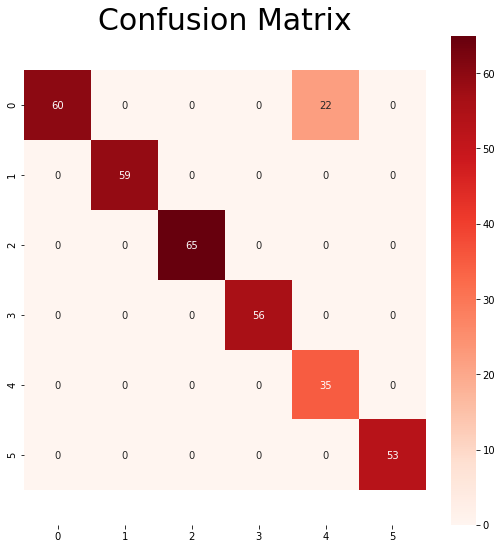

In [ ]:
# creating a confusion matrix
cm = confusion_matrix(predictions_2, op_test_2_cat)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (9, 9)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Confusion Matrix', fontweight = 20, fontsize = 30)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!
plt.show()

**Precision, Recall, F1-score for Dataset_2**

In [ ]:
results = confusion_matrix(op_test_2_cat, predictions_2) 
print('Accuracy Score :',accuracy_score(op_test_2_cat, predictions_2)) 
print ('Report : ')
print (classification_report(op_test_2_cat, predictions_2)) 

Accuracy Score : 0.9371428571428572
Report : 
              precision    recall  f1-score   support

           0       0.73      1.00      0.85        60
           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00        56
           4       1.00      0.61      0.76        57
           5       1.00      1.00      1.00        53

    accuracy                           0.94       350
   macro avg       0.96      0.94      0.93       350
weighted avg       0.95      0.94      0.93       350



**Save models**

In [ ]:
model.save("Model_2")

# Rough work (Not included in the main code just for my reference and will be removed once the code is finalized)

### combined structure

In [ ]:
reconstructed_model = keras.models.load_model("my_model")

In [ ]:
df_bath = pd.read_csv('C:/Users/osman/Desktop/diff_scene_annot/bath_annot/vott-csv-export/bath_data-export.csv')
df_bed = pd.read_csv('C:/Users/osman/Desktop/diff_scene_annot/bed_annot/vott-csv-export/bedroom-export.csv')
df_bowl = pd.read_csv('C:/Users/osman/Desktop/diff_scene_annot/bowl_annot/vott-csv-export/bowling-export.csv')
df_dine = pd.read_csv('C:/Users/osman/Desktop/diff_scene_annot/dine_annot/vott-csv-export/dine-export.csv')
df_kitchen = pd.read_csv('C:/Users/osman/Desktop/diff_scene_annot/Kitchen_annot/vott-csv-export/Object_Detector-export.csv')
df_office = pd.read_csv('C:/Users/osman/Desktop/diff_scene_annot/office_annot/vott-csv-export/office-export.csv')

In [ ]:
df_bath['label'].unique()


array(['mirror', 'sink', 'toilet seat', 'bath tub', 'towel'], dtype=object)

In [ ]:
df_bed['label'].unique()

array(['bed', 'dresser cabinet', 'night table', 'night lamp'],
      dtype=object)

In [ ]:
df_bowl['label'].unique()

array(['Tv screen', 'Bowling rack', 'Bowling ball', 'bowling pins'],
      dtype=object)

In [ ]:
df_dine['label'].unique()

array(['dining table', 'dining table lamp', 'vase', 'table lamp'],
      dtype=object)

In [ ]:
df_kitchen['label'].unique()

array(['refrigerator', 'kitchen sink', 'oven', 'range hood'], dtype=object)

In [ ]:
df_office['label'].unique()

array(['chair', 'printer', 'computer', 'Monitor', 'Desk', 'keyboard'],
      dtype=object)

In [ ]:
inputs = keras.Input(shape=(25,))
dense = layers.Dense(64, activation='relu')
x=dense(inputs)
x = layers.Dense(64,  activation='relu')(x)
x = layers.Dense(32,  activation='relu')(x)
x = layers.Dense(16,  activation='relu')(x)
outputs = layers.Dense(6)(x)
model = keras.Model(inputs=inputs,outputs=outputs,name="Model_1")
#model.summary()
model.compile(loss='categorical_crossentropy' ,optimizer='adam' ,metrics=['accuracy'])

In [ ]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:
keras.utils.plot_model(model, "my_first_model.png")

In [ ]:
neurons1 = [ 20,  30, 50]
neurons2 = [ 20,  30, 50]
param_grid = dict(neurons1=neurons1,neurons2=neurons2 )
param_grid

{'neurons1': [20, 30, 50], 'neurons2': [20, 30, 50]}

In [ ]:
for n1,n2 in zip(neurons1,neurons2):
    print("%d for 1 and %d for 2" % (n1,n2))

20 for 1 and 20 for 2
30 for 1 and 30 for 2
50 for 1 and 50 for 2


In [ ]:
neurons1 = [ 20,  30, 50]
neurons2 = [ 120,  130, 150]
comb=zip(neurons1,neurons2)
comb_fin=set(comb)
comb_fin


{(20, 120), (30, 130), (50, 150)}

In [ ]:
neurons1 = [ 20,  30, 50]
neurons2 = [ 120,  130, 150]
comb=zip(neurons1,neurons2)
comb_fin=list(comb)
comb_fin

[(20, 120), (30, 130), (50, 150)]

In [ ]:
n1,n2=zip(*comb_fin)
print("n1=",n1)
print("n2",n2)

n1= (20, 30, 50)
n2 (120, 130, 150)


### ADASYN

In [ ]:
#ip_train_1_ad, op_train_1_ad = ADASYN().fit_sample(ip_train_1, op_train_1.values.ravel())
#print(sorted(Counter(op_train_1_ad).items()))

RuntimeError: Not any neigbours belong to the majority class. This case will induce a NaN case with a division by zero. ADASYN is not suited for this specific dataset. Use SMOTE instead.

In [ ]:
op_train_chk.Class=pd.Categorical(op_train_1.Class)

In [ ]:
op_train_1['CLass_code'] = op_train_chk.Class.cat.codes

AttributeError: 'Categorical' object has no attribute 'cat'

In [ ]:
op_train_1['Class']

567            office
295       dining room
91           bathroom
1            bathroom
94           bathroom
            ...      
369       dining room
320       dining room
527            office
125               bed
265    bowling_lounge
Name: Class, Length: 455, dtype: object

In [ ]:
upsampled_df.index.value_counts()

411    14
515    13
423    13
203    13
510    13
       ..
18      1
222     1
224     1
308     1
567     1
Length: 568, dtype: int64

## prepraing test data

In [ ]:
# create the Labelencoder object
le = preprocessing.LabelEncoder()
op_test_1['Class'] = le.fit_transform(op_test_1['Class'])
op_test_1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Class
2509,2
3344,1
1361,1
188,4
1707,1
...,...
729,1
349,2
3356,5
1076,2


In [ ]:
op_test_1_cat= to_categorical(op_test_1)

In [ ]:
ip_test_1_samp=ip_test_1
x = ip_test_1_samp.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
ip_test_Nor = pd.DataFrame(x_scaled,columns=ip_test_1_samp.columns)